In [1]:
import yfinance as yf
import pandas as pd
import ta

#Download historical stock data for Apple for past 60 days & ofc 5 min interval 
df = yf.download("AAPL", period="60d", interval="5m")


# Flatten MultiIndex columns if they exist
if isinstance(df.columns, pd.MultiIndex):
    df.columns = [col[0] if col[0] != "Datetime" else col[0] for col in df.columns]

df.reset_index(inplace=True)

for col in ['Open', 'High', 'Low', 'Close', 'Volume']:
    df[col] = pd.to_numeric(df[col], errors='coerce')

C:\Users\rishi\AppData\Local\Temp\ipykernel_30504\2880152889.py:6: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download("AAPL", period="60d", interval="5m")
[*********************100%***********************]  1 of 1 completed


In [2]:
df = ta.add_all_ta_features(
    df,
    open="Open",
    high="High",
    low="Low",
    close="Close",
    volume="Volume",
    fillna=True  # fills NaNs without dropping rows
)

df.to_csv("AAPL_60d_5min_with_indicators.csv", index=False)

print(df.head())
print("\nColumns now:")
print(df.columns)

                   Datetime       Close        High         Low        Open  \
0 2025-06-27 13:30:00+00:00  202.839905  203.220001  201.259995  201.895004   
1 2025-06-27 13:35:00+00:00  202.285004  202.889999  202.139999  202.813400   
2 2025-06-27 13:40:00+00:00  202.190002  202.529999  201.929993  202.300003   
3 2025-06-27 13:45:00+00:00  202.505005  202.580002  202.090103  202.225006   
4 2025-06-27 13:50:00+00:00  202.839996  203.130005  202.445404  202.505005   

    Volume    volume_adi  volume_obv  volume_cmf      volume_fi  ...  \
0  3499442  2.142176e+06     3499442    0.612148       0.000000  ...   
1  1001258  1.528082e+06     2498184    0.339521 -555599.188660  ...   
2   710984  1.433301e+06     1787200    0.275017 -485877.068551  ...   
3   626628  1.868073e+06     2413828    0.319968 -388267.580208  ...   
4   844804  1.997130e+06     3258632    0.298832 -292371.908576  ...   

   momentum_ppo  momentum_ppo_signal  momentum_ppo_hist  momentum_pvo  \
0      0.000000    

# Selected Indicators for Intraday Price Prediction

For our intraday price prediction model, we are using a reduced set of important indicators derived from OHLCV data. These indicators help the model understand **trend, momentum, volatility, and volume patterns** in the market.

## 1. Base Data (OHLCV)
- **Open**: Price at the start of the time interval.
- **High**: Highest price during the interval.
- **Low**: Lowest price during the interval.
- **Close**: Price at the end of the interval.
- **Volume**: Number of shares traded during the interval.

These are fundamental to any price prediction task.

---

## 2. Trend Indicators
- **trend_sma_fast**: Fast Simple Moving Average. Captures short-term trend.
- **trend_sma_slow**: Slow Simple Moving Average. Shows long-term trend.
- **trend_ema_fast**: Fast Exponential Moving Average. Gives more weight to recent prices, capturing short-term movements quickly.
- **trend_ema_slow**: Slow Exponential Moving Average. Smoother long-term trend detection.
- **trend_macd_diff**: Difference between MACD line and signal line. Shows momentum and potential reversals.
- **trend_adx**: Average Directional Index (0-100). Measures strength of a trend (regardless of direction).

---

## 3. Momentum Indicators
- **momentum_rsi**: Relative Strength Index (0-100). Indicates overbought (>70) or oversold (<30) conditions.
- **momentum_stoch_rsi_k**: Fast %K of Stochastic RSI. Sensitive momentum indicator.
- **momentum_stoch_rsi_d**: Smoothed %D of Stochastic RSI. Helps reduce noise.
- **momentum_roc**: Rate of Change. Shows the percentage change in price over a period.

Momentum indicators are critical for detecting short-term price swings.

---

## 4. Volatility Indicators
- **volatility_atr**: Average True Range. Measures market volatility; higher ATR indicates more price movement.
- **volatility_bbw**: Bollinger Band Width. Captures the width of the Bollinger Bands; wider bands indicate higher volatility.

Volatility helps the model adjust for how "risky" the market is at a given interval.

---

## 5. Volume Indicators
- **volume_obv**: On-Balance Volume. Cumulative volume showing buying/selling pressure.
- **volume_vwap**: Volume Weighted Average Price. Weighted average price, often used as a benchmark for intraday trades.
- **volume_mfi**: Money Flow Index. Combines price and volume to identify overbought/oversold conditions.

Volume indicators are important for validating trends and momentum patterns.

---

By using this reduced set of 18 features, the model can focus on the **most informative signals** while avoiding noise from redundant or highly correlated indicators.


In [3]:
import pandas as pd

df = pd.read_csv("AAPL_60d_5min_with_indicators.csv")

# Select important columns
important_columns = [
    "Open", "High", "Low", "Close", "Volume",
    "trend_sma_fast", "trend_sma_slow", "trend_ema_fast", "trend_ema_slow",
    "trend_macd_diff", "trend_adx",
    "momentum_rsi", "momentum_stoch_rsi_k", "momentum_stoch_rsi_d", "momentum_roc",
    "volatility_atr", "volatility_bbw",
    "volume_obv", "volume_vwap", "volume_mfi"
]

In [4]:
df_reduced = df[important_columns].copy()

df_reduced.to_csv("AAPL_60d_5min_reduced.csv", index=False)

print("Reduced dataset saved! Columns included:")
print(df_reduced.columns.tolist())

Reduced dataset saved! Columns included:
['Open', 'High', 'Low', 'Close', 'Volume', 'trend_sma_fast', 'trend_sma_slow', 'trend_ema_fast', 'trend_ema_slow', 'trend_macd_diff', 'trend_adx', 'momentum_rsi', 'momentum_stoch_rsi_k', 'momentum_stoch_rsi_d', 'momentum_roc', 'volatility_atr', 'volatility_bbw', 'volume_obv', 'volume_vwap', 'volume_mfi']


In [5]:
print(df_reduced.isna().sum())   # Check for Nans
df_reduced = df_reduced.dropna().reset_index(drop=True)

Open                    0
High                    0
Low                     0
Close                   0
Volume                  0
trend_sma_fast          0
trend_sma_slow          0
trend_ema_fast          0
trend_ema_slow          0
trend_macd_diff         0
trend_adx               0
momentum_rsi            0
momentum_stoch_rsi_k    0
momentum_stoch_rsi_d    0
momentum_roc            0
volatility_atr          0
volatility_bbw          0
volume_obv              0
volume_vwap             0
volume_mfi              0
dtype: int64


In [6]:
print(df_reduced)

            Open        High         Low       Close   Volume  trend_sma_fast  \
0     201.895004  203.220001  201.259995  202.839905  3499442      202.839905   
1     202.813400  202.889999  202.139999  202.285004  1001258      202.562454   
2     202.300003  202.529999  201.929993  202.190002   710984      202.438304   
3     202.225006  202.580002  202.090103  202.505005   626628      202.454979   
4     202.505005  203.130005  202.445404  202.839996   844804      202.531982   
...          ...         ...         ...         ...      ...             ...   
4573  251.744995  251.789993  251.029999  251.320007  1121242      248.908610   
4574  251.320007  251.669998  251.100006  251.565094  1168002      249.468201   
4575  251.565002  252.399902  251.470001  251.779999  1457450      250.038200   
4576  251.789993  252.660004  251.785004  252.589996  1206653      250.619034   
4577  252.585007  252.630096  252.130005  252.250000   653039      251.199034   

      trend_sma_slow  trend

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# load (try to parse Datetime if present)
fn = "AAPL_60d_5min_reduced.csv"
df = pd.read_csv(fn)
if "Datetime" in df.columns:
    df["Datetime"] = pd.to_datetime(df["Datetime"])
    df.set_index("Datetime", inplace=False)   # keep index optional

print("shape:", df.shape)
print(df.columns.tolist())
print(df.dtypes)
print(df.head())


shape: (4578, 20)
['Open', 'High', 'Low', 'Close', 'Volume', 'trend_sma_fast', 'trend_sma_slow', 'trend_ema_fast', 'trend_ema_slow', 'trend_macd_diff', 'trend_adx', 'momentum_rsi', 'momentum_stoch_rsi_k', 'momentum_stoch_rsi_d', 'momentum_roc', 'volatility_atr', 'volatility_bbw', 'volume_obv', 'volume_vwap', 'volume_mfi']
Open                    float64
High                    float64
Low                     float64
Close                   float64
Volume                    int64
trend_sma_fast          float64
trend_sma_slow          float64
trend_ema_fast          float64
trend_ema_slow          float64
trend_macd_diff         float64
trend_adx               float64
momentum_rsi            float64
momentum_stoch_rsi_k    float64
momentum_stoch_rsi_d    float64
momentum_roc            float64
volatility_atr          float64
volatility_bbw          float64
volume_obv                int64
volume_vwap             float64
volume_mfi              float64
dtype: object
         Open        H

In [8]:
# missing
miss = df.isna().sum().sort_values(ascending=False)
miss_pct = (miss / len(df) * 100).round(3)
print(pd.concat([miss, miss_pct], axis=1, keys=["n_missing","pct_missing"]).head(20))

# summary stats (gives mean/std/min/max)
print(df.describe().T)

                      n_missing  pct_missing
Open                          0          0.0
High                          0          0.0
Low                           0          0.0
Close                         0          0.0
Volume                        0          0.0
trend_sma_fast                0          0.0
trend_sma_slow                0          0.0
trend_ema_fast                0          0.0
trend_ema_slow                0          0.0
trend_macd_diff               0          0.0
trend_adx                     0          0.0
momentum_rsi                  0          0.0
momentum_stoch_rsi_k          0          0.0
momentum_stoch_rsi_d          0          0.0
momentum_roc                  0          0.0
volatility_atr                0          0.0
volatility_bbw                0          0.0
volume_obv                    0          0.0
volume_vwap                   0          0.0
volume_mfi                    0          0.0
                       count          mean           st

All columns are perfect...But Volume has huge spikes - Mean - 557k but max is 14 million.... 75th quartile - 604k 
momentum_roc 0 03.18 -> +3.85 gotta check 
volatility_bbw - max - 6.56 - wide.... 

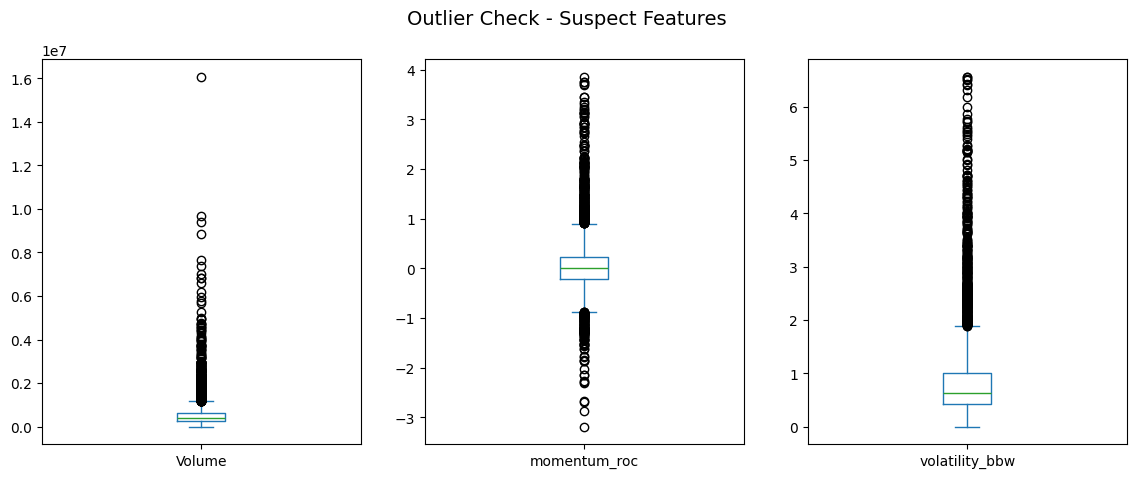

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# load dataset again
fn = "AAPL_60d_5min_reduced.csv"
df = pd.read_csv(fn)

# make sure datetime index is set (optional)
if "Datetime" in df.columns:
    df["Datetime"] = pd.to_datetime(df["Datetime"])
    df.set_index("Datetime", inplace=True)

# Suspect columns
suspects = ["Volume", "momentum_roc", "volatility_bbw"]

# Plot boxplots
df[suspects].plot(
    kind="box", 
    subplots=True, 
    layout=(1, 3), 
    figsize=(14, 5), 
    sharey=False
)
plt.suptitle("Outlier Check - Suspect Features", fontsize=14)
plt.show()

From the graph we can clearly see that volume is majorly in 100-800k but some values spike above.... Outliers... 
In financial time series, these “outliers” are often real events (earnings, market crashes, high-volume days). So we can’t just delete them blindly..

In [10]:
df.describe()

,Open,High,Low,Close,Volume,trend_sma_fast,trend_sma_slow,trend_ema_fast,trend_ema_slow,trend_macd_diff,trend_adx,momentum_rsi,momentum_stoch_rsi_k,momentum_stoch_rsi_d,momentum_roc,volatility_atr,volatility_bbw,volume_obv,volume_vwap,volume_mfi
count,4578.000000,4578.000000,4578.000000,4578.000000,4.578000e+03,4578.000000,4578.000000,4578.000000,4578.000000,4578.000000,4578.000000,4578.000000,4578.000000,4578.000000,4578.000000,4578.000000,4578.000000,4.578000e+03,4578.000000,4578.000000
mean,221.752883,221.960239,221.545347,221.757035,5.822582e+05,221.698047,221.627997,221.699455,221.631024,0.001298,24.868508,51.165257,0.490633,0.490326,0.058388,0.423083,0.882078,9.108657e+07,221.719016,51.841744
std,12.070885,12.079890,12.068583,12.075756,6.969266e+05,12.038537,12.004781,12.034774,11.992917,0.119827,11.368354,12.318013,0.321941,0.308389,0.573598,0.186148,0.807291,5.484560e+07,12.040236,17.048268
min,199.714996,199.990005,199.260696,199.720001,0.000000e+00,199.995227,200.113211,200.106684,200.189783,-0.442034,0.000000,0.000000,0.000000,0.000000,-3.186668,0.000000,0.000000,-1.265650e+07,199.970093,0.000000
25%,210.919998,211.059998,210.771252,210.929993,2.641650e+05,210.912249,210.833390,210.896116,210.887146,-0.053550,16.835504,43.030332,0.188445,0.204436,-0.207639,0.284548,0.423763,4.214886e+07,210.914578,40.174921
50%,224.807495,225.029999,224.695000,224.809998,3.903105e+05,224.782634,224.738507,224.761189,224.761435,-0.001104,22.293019,50.845550,0.487452,0.491070,0.015287,0.379013,0.632561,1.083257e+08,224.766317,51.569562
75%,231.802498,232.084946,231.527500,231.806648,6.266850e+05,231.725024,231.622769,231.745672,231.692766,0.051011,31.020562,58.485830,0.782294,0.767063,0.235120,0.517712,1.010998,1.355798e+08,231.691499,64.175628
max,252.585007,252.660004,252.130005,252.589996,1.607591e+07,251.199034,248.100015,250.767125,248.989931,0.809396,73.777843,100.000000,1.000000,1.000000,3.858474,1.343030,6.561490,2.084163e+08,249.454208,100.000000


In [1]:
import pandas as pd

# Load the reduced dataset
fn = "AAPL_60d_5min_reduced.csv"
df = pd.read_csv(fn)

# Optional: set datetime index if present
if "Datetime" in df.columns:
    df["Datetime"] = pd.to_datetime(df["Datetime"])
    df.set_index("Datetime", inplace=True)

print("Dataset shape:", df.shape)
print(df.head())


Dataset shape: (4578, 20)
         Open        High         Low       Close   Volume  trend_sma_fast  \
0  201.895004  203.220001  201.259995  202.839905  3499442      202.839905   
1  202.813400  202.889999  202.139999  202.285004  1001258      202.562454   
2  202.300003  202.529999  201.929993  202.190002   710984      202.438304   
3  202.225006  202.580002  202.090103  202.505005   626628      202.454979   
4  202.505005  203.130005  202.445404  202.839996   844804      202.531982   

   trend_sma_slow  trend_ema_fast  trend_ema_slow  trend_macd_diff  trend_adx  \
0      202.839905      202.839905      202.839905         0.000000        0.0   
1      202.562454      202.754535      202.798801        -0.035412        0.0   
2      202.438304      202.667684      202.753705        -0.061734        0.0   
3      202.454979      202.642657      202.735283        -0.054672        0.0   
4      202.531982      202.673017      202.743039        -0.025654        0.0   

   momentum_rsi  m

In [4]:
df["target_close"] = df["Close"].shift(-2)
df = df.dropna().reset_index(drop=True)

print(df[["Close", "target_close"]].head(10))


        Close  target_close
0  202.839905    202.190002
1  202.285004    202.505005
2  202.190002    202.839996
3  202.505005    202.797394
4  202.839996    202.770004
5  202.797394    202.139999
6  202.770004    202.080002
7  202.139999    201.949997
8  202.080002    201.720001
9  201.949997    201.580093
